## 確認套件已經安裝

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np

from google.colab import files

from sklearn.utils import shuffle

import tensorflow as tf
import tensorflow.keras as keras
from keras.utils import to_categorical

import matplotlib.pyplot as plt

from pylab import rcParams

!pip install -q requests

## 下載並開啟資料檔，將內容存放到變數 pkgo
程式會自動抓取我們為你準備好的資料集 pkgo_nyc_class5.csv.bz2

如果下載失敗，請自行上傳檔案

In [2]:
import requests

# 設定 GitHub 下戴網址
data_file = 'pkgo_nyc_class5.csv.bz2'
dataset_url = 'https://github.com/hdyen/hands-on-dl/raw/master/PKGO/dataset/'
data_url = '{}{}'.format(dataset_url, data_file)

if not os.path.exists(data_file):
    try:
        r = requests.get(data_url)
        # 將從 GitHub 下戴的資料集寫入 colab 本地端
        with open(data_file, 'wb') as f:
            f.write(r.content)
    except:
        # 如果無法從 GitHub 下戴資料，則自行上傳 pkgo_nyc_class5.csv.bz2
        print('下戴之敗！請將本機端的資料 pkgo_nyc_class5.csv.bz2 上傳到 colab 環境')
        uploaded = files.upload()

pkgo = pd.read_csv(data_file)
pkgo.shape

(1836, 201)

In [3]:
def Xy_split(pkgo):
  num_cols = pkgo.shape[1]
  # 取class之前的所有features當作X 做待會的輸入數據
  X = pkgo.iloc[:, :num_cols-1]
  # 取class當作y label
  y = pkgo['class']
  
  # 型別轉換，確保資料型態正確
  X = X.astype(np.float32)
  y = y.astype(np.int)
  
  # 對 y 做 one-hot encoding
  y = to_categorical(y)
  
  # 打亂資料集
  X, y = shuffle(X, y)
  
  return X, y

X, y = Xy_split(pkgo)

X.shape, y.shape

((1836, 200), (1836, 5))

In [4]:
#切分訓練集與測試集
x_train, y_train, x_test, y_test = X[0:1500], y[0:1500], X[1500::], y[1500::]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1500, 200), (1500, 5), (336, 200), (336, 5))

![alt text](https://gitlab.aiacademy.tw/tclin/at091-DL/raw/master/pic/model_training_tip.png)

## 建構一個模型 (以目前的學到的最佳元件組合)

![alt text](https://gitlab.aiacademy.tw/tclin/at091-DL/raw/master/pic/component_selection_bast_subset.png)

In [5]:
''' Import keras to build a DL model '''
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

def build_model(X):
  # 選擇Sequential 次序性為這次深度學習模型
  model = Sequential()
  
  # 第一層的hidden laryer (512 neurons)與指定 input 的維度
  model.add(Dense(512, input_dim=X.shape[-1]))
  model.add(Activation('relu'))
  
  # 加入第二層 hidden layer (512 neurons)
  model.add(Dense(512))
  model.add(Activation('relu'))
  
  # 加入 output layer (5 neurons)
  model.add(Dense(5))
  model.add(Activation('softmax'))
  return model

## 觀察Overfitting的問題

In [6]:
''' 編譯模型 '''
# 將建構好的模型存放至model變數
# 用ex06中，結果較優的Adam當作我們的 optimizer
# accuracy當作我們的指標
model = build_model(X)
optim = Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

batch_size = 32
epochs = 100

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              shuffle=True,
              validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 2s 14ms/step - loss: 3.7253 - accuracy: 0.3557 - val_loss: 1.2001 - val_accuracy: 0.6233
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 1.2280 - accuracy: 0.5829 - val_loss: 1.1633 - val_accuracy: 0.5867
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 1.1414 - accuracy: 0.5708 - val_loss: 0.9948 - val_accuracy: 0.6667
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.9851 - accuracy: 0.6576 - val_loss: 1.1411 - val_accuracy: 0.5467
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 1.1152 - accuracy: 0.5956 - val_loss: 1.0681 - val_accuracy: 0.6367
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.9828 - accuracy: 0.6381 - val_loss: 1.1217 - val_accuracy: 0.5733
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.9225 - accuracy: 0.6815 - val_loss: 0.9120 - val_accuracy: 0.7033
Epoch 8/100


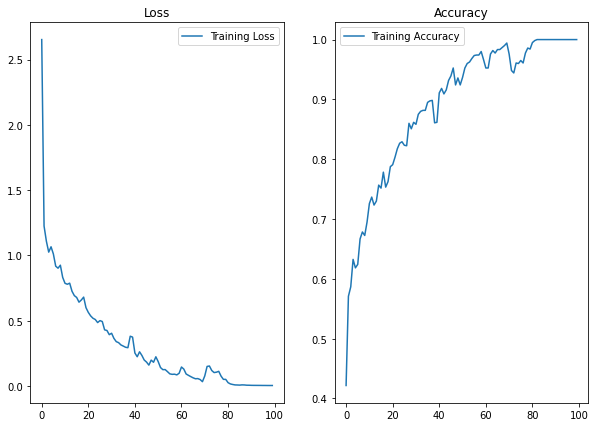

In [7]:
''' Visualize the training/validation loss and training/validation accuracy'''
rcParams['figure.figsize'] = 10, 7

loss = history.history.get('loss')          # 取出訓練完成後loss的訓練數據
#val_loss = history.history.get('val_loss')  

acc = history.history.get('accuracy')            # 取出訓練完成後accuracy的訓練數據
#val_acc = history.history.get('val_accuracy')   
    
plt.figure(0)

plt.subplot(121)

# 繪出loss的線條
plt.plot(range(len(loss)), loss, label='Training Loss')
#plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Loss')


plt.subplot(122)
# 繪出accuracy的線條
plt.plot(range(len(acc)), acc, label='Training Accuracy')
#plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Accuracy')

plt.show()

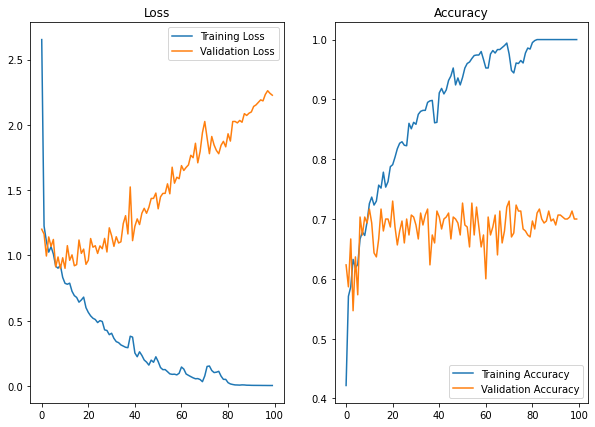

In [8]:
''' Visualize the training/validation loss and training/validation accuracy'''
rcParams['figure.figsize'] = 10, 7

loss = history.history.get('loss')          # 取出訓練完成後loss的訓練數據
val_loss = history.history.get('val_loss')  # 取出訓練完成後val_loss的訓練數據

acc = history.history.get('accuracy')            # 取出訓練完成後accuracy的訓練數據
val_acc = history.history.get('val_accuracy')    # 取出訓練完成後val_accuracy的訓練數據
    
plt.figure(0)

plt.subplot(121)

# 個別繪出loss以及val_loss的線條
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Loss')


plt.subplot(122)
# 個別繪出accuracy以及val_accuracy的線條
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Accuracy')

plt.show()

In [9]:
#evaluate model
pred = model.evaluate(x_test, y_test, verbose=2)

11/11 - 0s - loss: 2.9070 - accuracy: 0.6577


![alt text](https://gitlab.aiacademy.tw/tclin/at091-DL/raw/master/pic/overfitting-1.png)

## 處理overfitting問題:

1.   Regularization
2.   Early Stop
3.   Dropout
4.   Batch Normalization
5.   其它: 增加樣本、資料增強(data augmentation)..etc.


![alt text](https://gitlab.aiacademy.tw/tclin/at091-DL/raw/master/pic/regularization-1.png)

<hr/>

![alt text](https://gitlab.aiacademy.tw/tclin/at091-DL/raw/master/pic/regularization-2.png)

<hr/>

![alt text](https://gitlab.aiacademy.tw/tclin/at091-DL/raw/master/pic/L1_and_L2_balls.png)

#Regularization: 在模型建構時加入regularizer

In [10]:
''' Import keras to build a DL model '''
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras.optimizers import Adam
''' Import l1,l2 (regularizer) '''
from keras.regularizers import l1, l2, l1_l2

def build_model_Reg(X, l1_alpha, l2_alpha):
  # 選擇Sequential 次序性為這次深度學習模型
  model = Sequential()
  
  # 第一層的hidden laryer 並加入 regularizer _ l1、l2
  model.add(Dense(512, input_dim=X.shape[-1], kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
  model.add(Activation('relu'))
  
  # 第二層的hidden laryer 並加入 regularizer _ l1、l2
  model.add(Dense(512, kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
  model.add(Activation('relu'))
  
  # 加入 output layer (5 neurons)，也將regularization，l1、l2帶入
  model.add(Dense(5, kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
  model.add(Activation('softmax'))
  return model

**比較不同 regularizer 對訓練結果之差異**

In [12]:
#@title Regularizer Comparison { vertical-output: false, display-mode: "both" }

import keras.backend as K

# 建立一個list存放待會要做比較的 regularizer的值
l1_l2_list = [(0, 0), (0.0005, 0), (0, 0.0005), (0.0005, 0.0005)] #@param {type:"raw"}

batch_size = 32
epochs = 100
# 建立兩個train_list來儲存之後使用不同數值regularizer訓練出來的結果
train_loss_list = []
train_acc_list = []
# 建立兩個valid_list來儲存之後使用不同數值regularizer驗證出來的結果
valid_loss_list = []
valid_acc_list = []

# 將每一個不同的regularizer代入做訓練
for l1_alpha, l2_alpha in l1_l2_list:
  K.clear_session() # 清掉上次訓練的結果
  print('Building a model with regularizer L1: {}, L2: {}'.format(l1_alpha, l2_alpha))
    
  ''' 編譯模型 '''
# 將建構好的模型存放至model變數
# 用ex06中，結果較優的Adam當作我們的 optimizer
# accuracy當作我們的指標
  model_reg = build_model_Reg(X, l1_alpha, l2_alpha)
  optim = Adam(lr=1e-4, decay=1e-3)
  model_reg.compile(loss='categorical_crossentropy',
                optimizer=optim,
                metrics=['accuracy'])
  
  # 訓練參數設定都與前次模型訓練一樣！ 
  history_reg = model_reg.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=0,
                shuffle=True,
                validation_split=0.2)
  
  # 將(val)loss 和 (val)acc 儲存之後在裝進(valild)train_loss/acc變數中
  # 儲存每一個不同regularization的結果，最後用於繪製結果
  
  loss = history_reg.history.get('loss')
  acc = history_reg.history.get('accuracy')
  val_loss = history_reg.history.get('val_loss')
  val_acc = history_reg.history.get('val_accuracy')

  train_loss_list.append(loss)
  valid_loss_list.append(val_loss)
  train_acc_list.append(acc)
  valid_acc_list.append(val_acc)

Building a model with regularizer L1: 0, L2: 0
Building a model with regularizer L1: 0.0005, L2: 0
Building a model with regularizer L1: 0, L2: 0.0005
Building a model with regularizer L1: 0.0005, L2: 0.0005


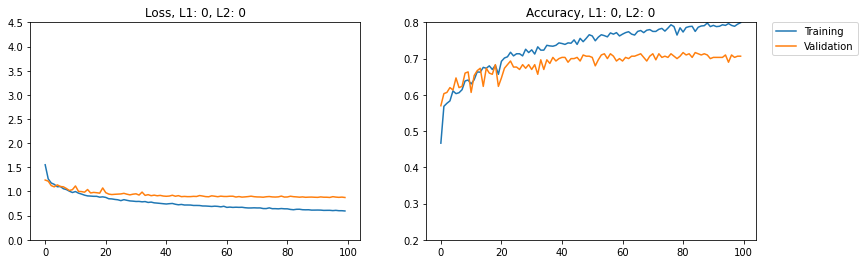

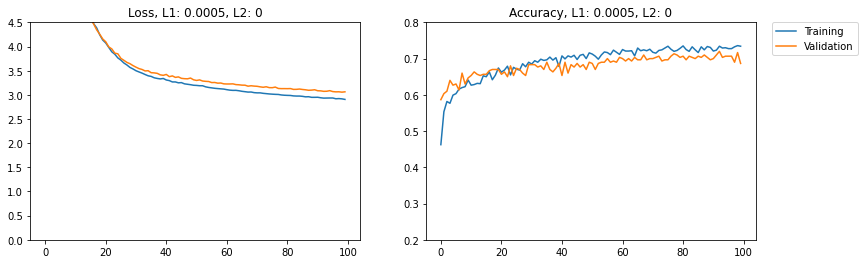

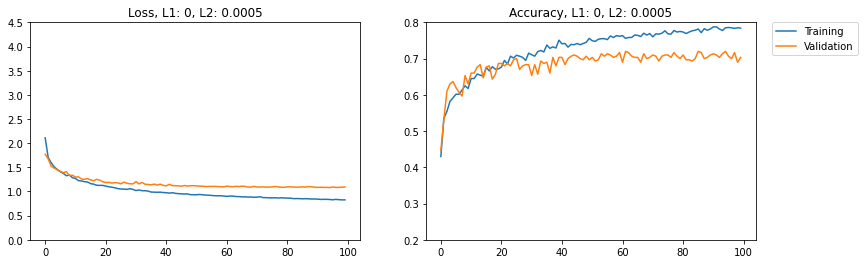

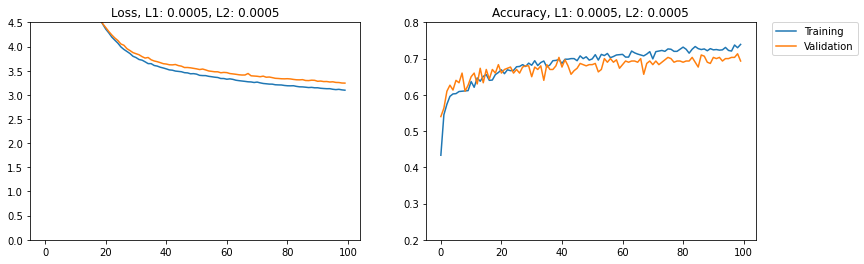

In [14]:
''' Visualize the training/validation loss and training/validation accuracy'''
rcParams['figure.figsize'] = 13, 4

for k in range(len(l1_l2_list)):
  plt.figure(0)
  
  plt.subplot(121)
  l1, l2 = l1_l2_list[k]
  loss = train_loss_list[k]
  val_loss = valid_loss_list[k]
  plt.plot(range(len(loss)), loss, label='Training')
  plt.plot(range(len(val_loss)), val_loss, label='Validation')
  title = 'Loss, L1: {}, L2: {}'.format(l1, l2)
  plt.ylim([0, 4.5])
  plt.title(title)
  
  plt.subplot(122)
  l1, l2 = l1_l2_list[k]
  acc = train_acc_list[k]
  val_acc = valid_acc_list[k]
  plt.plot(range(len(acc)), acc, label='Training')
  plt.plot(range(len(val_acc)), val_acc, label='Validation')
  title = 'Accuracy, L1: {}, L2: {}'.format(l1, l2)
  plt.ylim([0.2, 0.8])
  plt.title(title)
  
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

  plt.show()

In [15]:
#Regularization
pred_reg = model_reg.evaluate(x_test, y_test, verbose=2)

11/11 - 0s - loss: 3.2970 - accuracy: 0.6696


# Early Stop: 在適當的訓練回合即停止訓練, 保留最好的參數訓練結果

In [16]:
n_patience = 20 # 訓練過程經過20次沒有進步之後停止

In [17]:
from keras.callbacks import EarlyStopping

# 建EarlyStopping，monitor以val_loss為主，經過五次patience，verbose=1：信息展示
early_stopping = EarlyStopping(monitor = 'val_loss', 
                 patience = n_patience, 
                 verbose = 1)

In [18]:
#Regularization設定: (示範期間先設0,不然會early stop機制會很慢觸發)
l1_alpha = 0.000
l2_alpha = 0.000

In [19]:
# 編譯模型
model_estop = build_model_Reg(X, l1_alpha, l2_alpha)
optim = Adam(lr=1e-3)
model_estop.compile(loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy'])

batch_size = 32
epochs = 100

# 訓練模型
history_estop = model_estop.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              shuffle=True,
              validation_split=0.2, callbacks=[early_stopping]) # 加上callbacks:earlystopping

Epoch 1/100
38/38 [==============================] - 1s 9ms/step - loss: 3.7431 - accuracy: 0.3852 - val_loss: 1.3838 - val_accuracy: 0.5067
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 1.2462 - accuracy: 0.5715 - val_loss: 1.1331 - val_accuracy: 0.5900
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 1.1713 - accuracy: 0.5579 - val_loss: 1.2205 - val_accuracy: 0.6333
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 1.0958 - accuracy: 0.6267 - val_loss: 1.0078 - val_accuracy: 0.6500
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 1.0033 - accuracy: 0.6370 - val_loss: 0.9891 - val_accuracy: 0.6367
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 0.9547 - accuracy: 0.6659 - val_loss: 0.9913 - val_accuracy: 0.6900
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 0.9394 - accuracy: 0.6630 - val_loss: 1.0723 - val_accuracy: 0.5833
Epoch 8/100
3

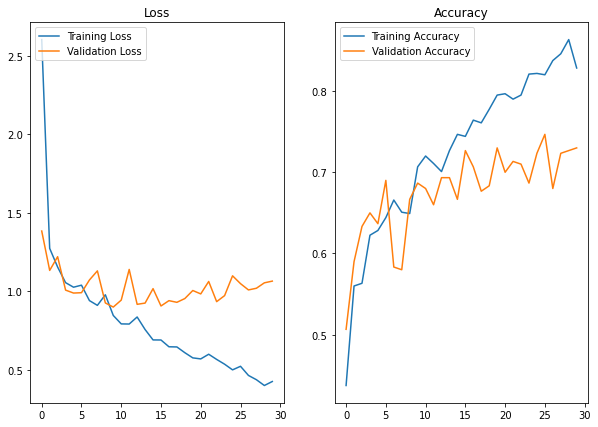

In [20]:
''' Visualize the training/validation loss and training/validation accuracy'''
rcParams['figure.figsize'] = 10, 7

loss = history_estop.history.get('loss')
val_loss = history_estop.history.get('val_loss')

acc = history_estop.history.get('accuracy')
val_acc = history_estop.history.get('val_accuracy')

plt.figure(0)

plt.subplot(121)

plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Loss')


plt.subplot(122)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')

plt.show()

In [21]:
#early stop +　Regularization
pred_estop = model_estop.evaluate(x_test, y_test, verbose=2)

11/11 - 0s - loss: 1.2927 - accuracy: 0.6905


# 使用Dropout
在模型訓練時，隨機將一些神經元關閉，避免神經元之間相互調適過度(prevents units from co-adapting too much)進行訓練，在Inference時打開所有神經元。
[參考論文連結](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

![alt text](https://gitlab.aiacademy.tw/tclin/at091-DL/raw/master/pic/dropout.png)

**建構一個有dropout的DNN網路架構**

In [22]:
''' Import keras to build a DL model '''
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, LeakyReLU, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping

def build_model_drp(X, drp_rate):
  model = Sequential()
  # 第一層的hidden laryer (512 neurons)與指定 input 的維度
  model.add(Dense(512, input_dim=X.shape[-1]))
  model.add(Activation('relu'))
  # 設定 dropout rate
  model.add(Dropout(drp_rate))
  # 第二層的hidden laryer (512 neurons)與指定 input 的維度
  model.add(Dense(512))
  model.add(Activation('relu'))   
  # 設定 dropout rate
  model.add(Dropout(drp_rate))
  model.add(Dense(5))
  model.add(Activation('softmax'))
  return model

## 比較不同 Dropout rate 的結果

In [23]:
import keras.backend as K
#@title Dropout Comparison { vertical-output: false, display-mode: "both" }

# 建立一個list存放待會要做比較的 dropout rates
dropout_rates = [0, 0.1, 0.2, 0.4, 0.6, 0.8]  #@param {type:"raw"}

# 建立兩個train_list來儲存之後使用不同數值dropout rate訓練出來的結果
train_loss_list = []
train_acc_list = []

# 建立兩個valid_list來儲存之後使用不同數值dropout rate驗證出來的結果
valid_loss_list = []
valid_acc_list = []

# 將每一個不同的dropout rate代入做訓練
for drp_rate in dropout_rates:
  K.clear_session() # 清掉上次訓練的結果
  
  ''' 編譯模型 '''
  # 將建構好的模型存放至model變數
  # 用ex06中，結果較優的Adam當作我們的 optimizer
  # accuracy當作我們的指標
  model_drp = build_model_drp(x_train, drp_rate)
  optim = Adam(lr=1e-4)
  model_drp.compile(loss='categorical_crossentropy',
                optimizer=optim,
                metrics=['accuracy'])
  
  batch_size= 32
    epochs= 100
  n_patience= 20
  
  # 建EarlyStopping
  early_stopping = EarlyStopping(monitor = 'val_loss', 
                    patience = n_patience, 
                    verbose = 1)

  print('Training a model with dropout rate: {}'.format(drp_rate))
  history_drp = model_drp.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=0,
                shuffle=True,
                validation_split=0.2,
                callbacks=[early_stopping])
  
  # 將(val)loss 和 (val)acc 儲存之後在裝進(valild)train_loss/acc變數中
  # 儲存每一個不同regularization的結果，最後用於繪製結果
  
  loss = history_drp.history.get('loss')
  acc = history_drp.history.get('accuracy')
  val_loss = history_drp.history.get('val_loss')
  val_acc = history_drp.history.get('val_accuracy')
  
  train_loss_list.append(loss)
  train_acc_list.append(acc)
  valid_loss_list.append(val_loss)
  valid_acc_list.append(val_acc)

Training a model with dropout rate: 0
Epoch 00074: early stopping
Training a model with dropout rate: 0.1
Epoch 00083: early stopping
Training a model with dropout rate: 0.2
Training a model with dropout rate: 0.4
Epoch 00024: early stopping
Training a model with dropout rate: 0.6
Epoch 00026: early stopping
Training a model with dropout rate: 0.8
Epoch 00037: early stopping


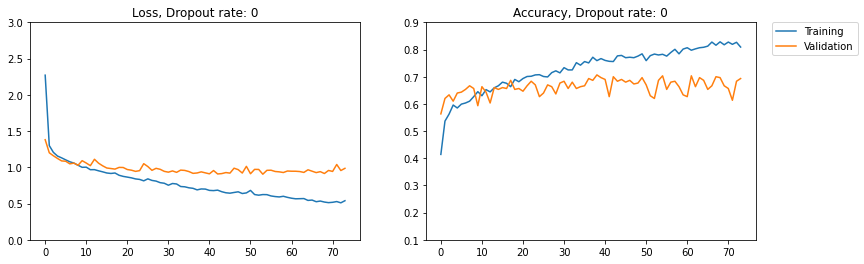

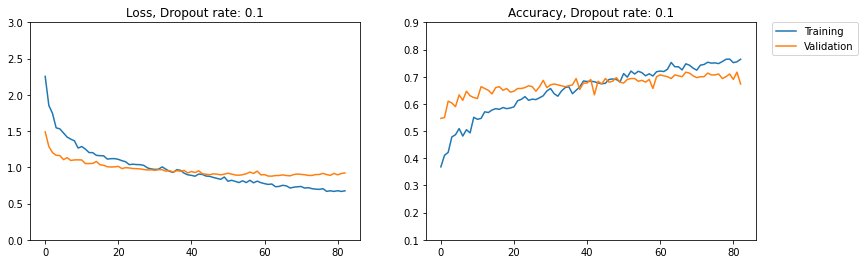

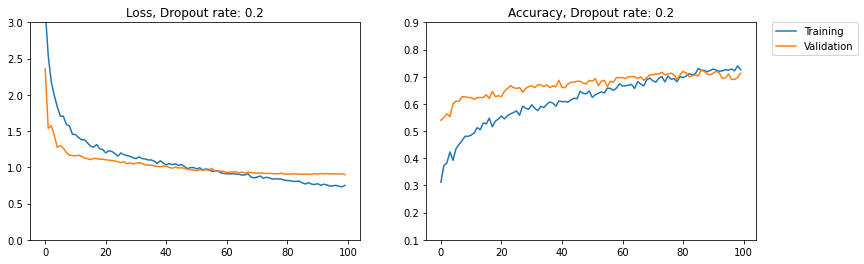

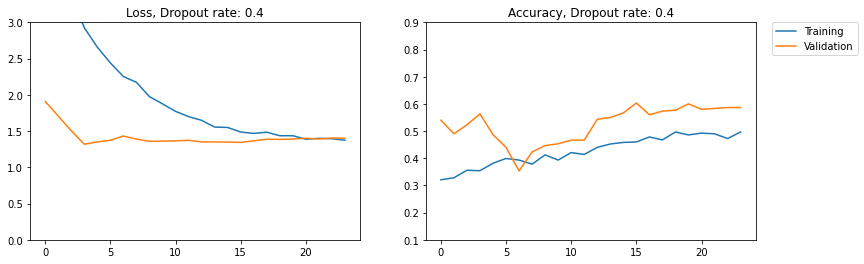

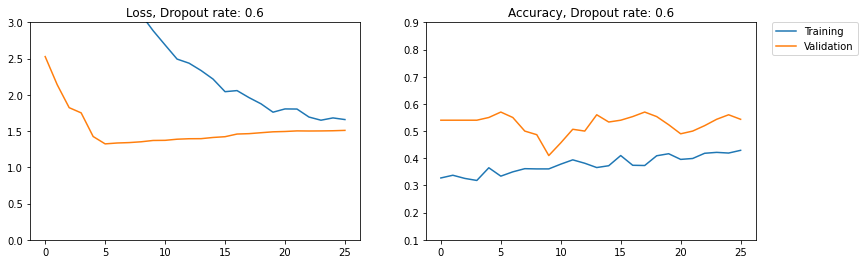

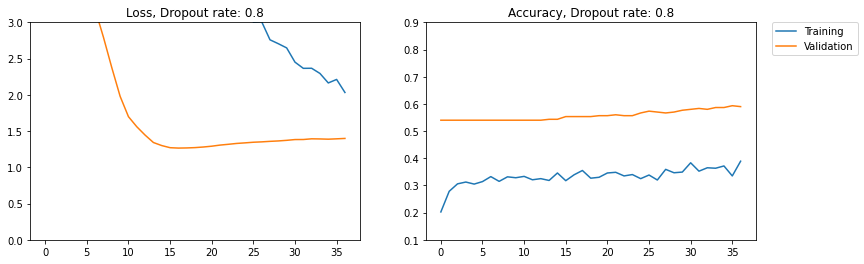

In [24]:
''' Visualize the training/validation loss and training/validation accuracy'''
rcParams['figure.figsize'] = 13, 4

for k in range(len(dropout_rates)):
  plt.figure(0)
  
  drp_rate = dropout_rates[k]
  
  plt.subplot(121)
  loss = train_loss_list[k]
  val_loss = valid_loss_list[k]
  plt.plot(range(len(loss)), loss, label='Training')
  plt.plot(range(len(val_loss)), val_loss, label='Validation')
  title = 'Loss, Dropout rate: {}'.format(drp_rate)
  plt.ylim([0.0, 3.0])
  plt.title(title)
  
  plt.subplot(122)
  acc = train_acc_list[k]
  val_acc = valid_acc_list[k]
  plt.plot(range(len(acc)), acc, label='Training')
  plt.plot(range(len(val_acc)), val_acc, label='Validation')
  title = 'Accuracy, Dropout rate: {}'.format(drp_rate)
  plt.ylim([0.1, 0.9])
  plt.title(title)
  
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

  plt.show()

# 使用Batch Normalization

Batch Normalization 的計算方式，先將 mini-batch 進行正規化(Normalize)至平均值為0、標準差為1，在y估計式引入學習參數scale(γ)和 shift(β)，讓模型學習其Batch Normalization後的特徵分佈如何透過scale及shift參數還原估計y值
[參考論文連結(2015)](https://arxiv.org/pdf/1502.03167.pdf)

![alt text](https://miro.medium.com/max/651/1*-yCzc6YlJHXe7LmCpqQmkg.png)



In [34]:
''' Import keras to build a DL model '''
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, LeakyReLU, Dropout, BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping

def build_model_bn(X, drp_rate=0.5):
  model = Sequential()
  # 第一層的hidden laryer (512 neurons)與指定 input 的維度
  model.add(Dense(512, input_dim=X.shape[-1]))

  #BatchNormalization layer加在Activation之前
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(drp_rate))

  # 第二層的hidden laryer (512 neurons)與指定 input 的維度
  model.add(Dense(512))

  #BatchNormalization layer加在Activation之前
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(drp_rate))

  model.add(Dense(5))
  model.add(Activation('softmax'))
  return model

In [41]:
from keras.callbacks import EarlyStopping

n_patience = 30

early_stopping = EarlyStopping(monitor = 'val_accuracy', 
                 patience = n_patience, 
                 verbose = 1)

In [57]:
''' 編譯模型 '''
model_bn = build_model_bn(x_train, 0.15)
optim = Adam(lr=1e-3)
model_bn.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

batch_size = 32
epochs = 100

history_bn = model_bn.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              shuffle=True,
              validation_split=0.2, callbacks=[early_stopping]) # 加上callbacks:earlystopping

Epoch 1/100
38/38 [==============================] - 1s 11ms/step - loss: 1.6616 - accuracy: 0.3811 - val_loss: 1.9462 - val_accuracy: 0.3000
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 1.1908 - accuracy: 0.5814 - val_loss: 1.4821 - val_accuracy: 0.3967
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 1.0007 - accuracy: 0.6368 - val_loss: 1.6697 - val_accuracy: 0.2700
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.9951 - accuracy: 0.6258 - val_loss: 1.6207 - val_accuracy: 0.3767
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.8898 - accuracy: 0.6753 - val_loss: 1.1037 - val_accuracy: 0.5733
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.8933 - accuracy: 0.6690 - val_loss: 0.9683 - val_accuracy: 0.6600
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7751 - accuracy: 0.7296 - val_loss: 0.9773 - val_accuracy: 0.6800
Epoch 8/100


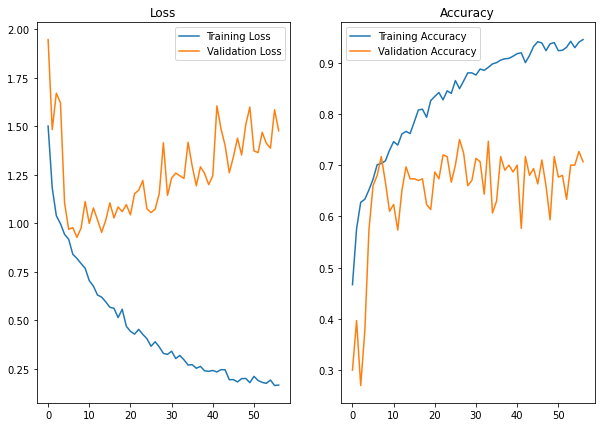

In [58]:
''' Visualize the training/validation loss and training/validation accuracy'''
rcParams['figure.figsize'] = 10, 7

loss = history_bn.history.get('loss')       # 取出訓練完成後loss的訓練數據
val_loss = history_bn.history.get('val_loss')   # 取出訓練完成後val_loss的訓練數據

acc = history_bn.history.get('accuracy')     # 取出訓練完成後accuracy的訓練數據
val_acc = history_bn.history.get('val_accuracy') # 取出訓練完成後val_accuracy的訓練數據

plt.figure(0)

plt.subplot(121)

# 個別繪出loss以及val_loss的線條
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Loss')


plt.subplot(122)
# 個別繪出accuracy以及val_accuracy的線條
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Accuracy')

plt.show()

In [59]:
#Batch Normalization + drop out
pred_bn = model_bn.evaluate(x_test, y_test, verbose=2)

11/11 - 0s - loss: 1.5755 - accuracy: 0.6726


In [60]:
import pandas as pd

#取得模型預測結果
predict=model_bn.predict_classes(x_test)

#取得y_test未進行one-hot encoding的label資料
raw_test_label=[]
for y_onehot in y_test:
  raw_test_label.append(y_onehot.argmax())

pd.crosstab([raw_test_label], predict, rownames=['class'], colnames=['predict'])

predict,0,1,2,3,4
class,,,,,
0,32,12,0,2,0
1,20,141,2,9,4
2,2,8,7,0,3
3,2,23,2,14,3
4,0,10,0,8,32


In [61]:
from sklearn import metrics
print(metrics.classification_report(raw_test_label, predict))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63        46
           1       0.73      0.80      0.76       176
           2       0.64      0.35      0.45        20
           3       0.42      0.32      0.36        44
           4       0.76      0.64      0.70        50

    accuracy                           0.67       336
   macro avg       0.62      0.56      0.58       336
weighted avg       0.67      0.67      0.66       336



# 關於Overfitting的一些看法

![alt text](https://gitlab.aiacademy.tw/tclin/at091-DL/raw/master/pic/overfitting-2.png)

<hr/>

# **更多的實作範例,請參考官方文件**

**Tensorflow官網範例:** https://www.tensorflow.org/overview?hl=zh-tw

例如:可以練習CNN模型的Cifar10影像分類實作 https://www.tensorflow.org/tutorials/images/cnn

**Keras官網範例:** https://keras.io/examples/

例如:時間序列的異常偵測 https://keras.io/examples/timeseries/timeseries_anomaly_detection